In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [3]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def calc_output(W, x):
    v =np.matmul(W,x)
    y =sigmoid(v)
    
    return y

def calc_error(d, y):
    e = d - y
    delta = y * (1-y) * e
    
    return delta

def delta_GD(W, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]
        
        y = calc_output(W, x)
        delta = calc_error(d, y)
        dW = alpha * delta * x
        W = W +dW
    return W, delta

In [5]:
X = np.array([[0, 0, 1],
             [0, 1, 1,],
             [1, 0, 1],
             [1, 1, 1]])

D = np.array([[0], [0], [0], [1]])

W = 2 * np.random.random((1,3)) - 1
alpha = 0.9

hist_W = []
hist_loss = []

for epoch in range(1000):
    W, delta = delta_GD(W, X, D, alpha)
    
    hist_loss.append(delta)
    hist_W.append(W)
    
    if epoch % 100 == 0:
        print(W)

[[ 0.71957823 -0.12759397  0.32159277]]
[[ 2.62895284  2.59074764 -3.97571952]]
[[ 3.4571179   3.43782064 -5.24583444]]
[[ 3.95249456  3.93970914 -5.99923789]]
[[ 4.30194354  4.29245929 -6.5285205 ]]
[[ 4.57042937  4.56292391 -6.93419413]]
[[ 4.78774807  4.78155416 -7.26204236]]
[[ 4.96993113  4.96466731 -7.5365861 ]]
[[ 5.12655615  5.12198474 -7.7724273 ]]
[[ 5.26378575  5.25974908 -7.97893895]]


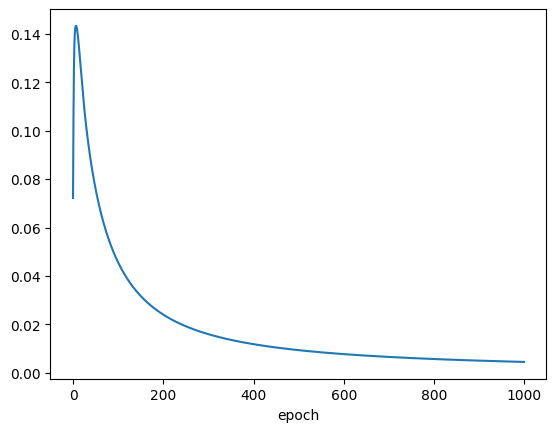

In [6]:
plt.plot(hist_loss)
plt.xlabel("epoch")
plt.show()

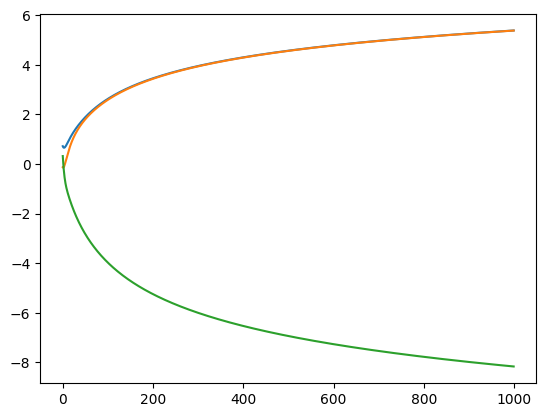

In [7]:
plt.plot(np.array(hist_W).reshape(-1, 3))

In [8]:
N = 4

for k in range(N):
    x = X[k, :].T
    y = calc_output(W, x)
    
    print(y)

[0.00028557]
[0.05843072]
[0.05862995]
[0.93117945]


In [ ]:
# pdf17번 추가학습 필요 #####